Importing the required Packages

In [2]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Data Eploration and Preprocessing

In [4]:
data=pd.read_csv('creditcard.csv')
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,371.478000,-0.185541,0.224434,0.873905,0.241431,-0.033144,0.152717,0.096350,-0.061222,-0.001297,...,0.004469,-0.124185,-0.039499,-0.000140,0.111538,0.026084,0.012885,-0.018732,66.430280,0.002000
std,223.289659,1.319761,1.154144,1.026305,1.257776,1.084735,1.235014,0.840424,0.883285,0.891584,...,0.630712,0.611319,0.356701,0.616917,0.429273,0.471476,0.319607,0.267576,187.272307,0.044699
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.980624,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.544209,-1.243924,-3.525281,-2.735623,0.000000,0.000000
25%,170.500000,-0.935897,-0.186676,0.307137,-0.492527,-0.562147,-0.632045,-0.334229,-0.174967,-0.493081,...,-0.219778,-0.543714,-0.177905,-0.364287,-0.166227,-0.304858,-0.047232,-0.023108,5.442500,0.000000
50%,368.000000,-0.377203,0.284608,0.884642,0.326839,-0.148192,-0.122938,0.089204,0.030920,-0.063950,...,-0.080389,-0.101654,-0.050473,0.090331,0.144451,0.003190,0.020374,0.020367,16.185000,0.000000
75%,559.250000,1.126162,0.867528,1.529554,1.067740,0.440822,0.476314,0.561682,0.252395,0.439243,...,0.083731,0.281740,0.074797,0.420861,0.419504,0.263968,0.109761,0.084432,55.112500,0.000000
max,755.000000,1.685314,5.267376,4.017561,4.861129,7.672544,5.122103,4.808426,3.877662,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.206820,3.087444,2.490503,1.575380,3828.040000,1.000000


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(1000, 31)

In [7]:
# checking fro the Duplicates
data.duplicated().sum()

7

In [8]:
# Removing the Duplicates
data.drop_duplicates(inplace=True)

data.duplicated().sum()

0

In [9]:
# checking for null or Missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Checking for distrubation of 'class' column
data['Class'].value_counts()

# With number of Fraud transactions beinh only 2 and genuine transactions to 991

Class
0    991
1      2
Name: count, dtype: int64

Feature Engineering and Splitting the Data

In [11]:
# Seperating features and label
x= data.drop('Class',axis=1)
y=data['Class']

In [12]:
#split the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [13]:
# Applying the Random Over Sampler to balance classes

oversampler=RandomOverSampler(random_state=42)
x_resampled,y_resampled=oversampler.fit_resample(x_train,y_train)

Training the Random Forest Classifier

In [14]:
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(x_resampled,y_resampled)

RandomForestClassifier(random_state=42)

Model Evaluation

In [15]:
# Make Prediction on test data

y_pred=rf_classifier.predict(x_test)

In [16]:
# Confusion Matrix
print("Confusuin Matrix : ")
print(confusion_matrix(y_test,y_pred))

Confusuin Matrix : 
[[199]]


c:\Users\gsaig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [17]:
# Classification Report

print("\n Classification Report : ")
print(classification_report(y_test,y_pred))


 Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



In [18]:
# Accuracy Score

print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  1.0


# Using Smote

In [19]:
data[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,993.000000,993.000000,993.000000
mean,373.528701,66.874209,0.002014
std,222.697591,187.856776,0.044856
min,0.000000,0.000000,0.000000
25%,180.000000,5.900000,0.000000
50%,369.000000,16.500000,0.000000
75%,561.000000,55.610000,0.000000
max,755.000000,3828.040000,1.000000


Importing the required packages from credit card fraud detection using smote

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


Distribuition of Normal(0) and Frauds(1): 
Class
0    991
1      2
Name: count, dtype: int64


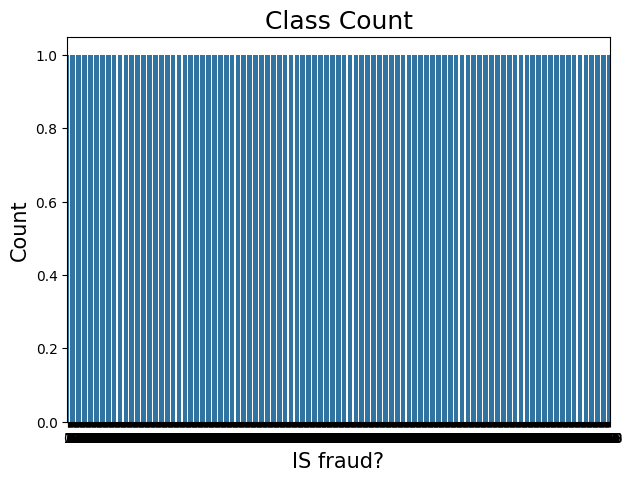

In [21]:
# Difference between Normal and Fraud Transactions
print("Distribuition of Normal(0) and Frauds(1): ")
print(data["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(data['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("IS fraud?",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

Time Features

In [22]:
time_d=pd.to_timedelta(data['Time'],unit='s')
data['Time_min']=(time_d.dt.components.minutes).astype(int)
data['Time_hour']=(time_d.dt.components.minutes).astype(int)


<Figure size 1200x500 with 0 Axes>

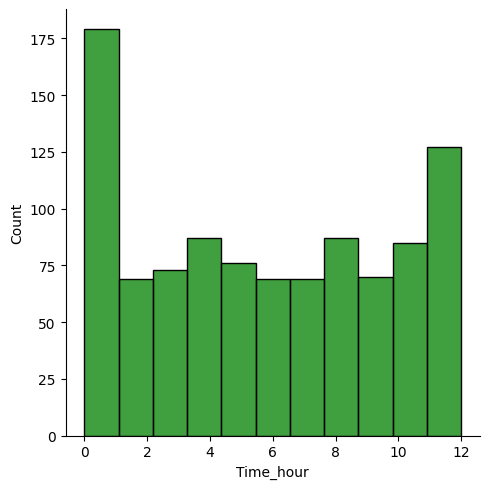

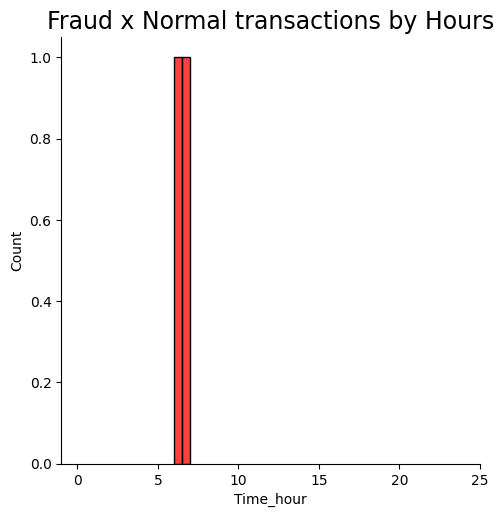

In [23]:
# Exploring the distribution by class types through hours and minutes

plt.figure(figsize=(12,5))
sns.displot(data[data['Class']==0]['Time_hour'],color='g')
sns.displot(data[data['Class']==1]['Time_hour'],color='r')
plt.title('Fraud x Normal transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

<Figure size 1200x500 with 0 Axes>

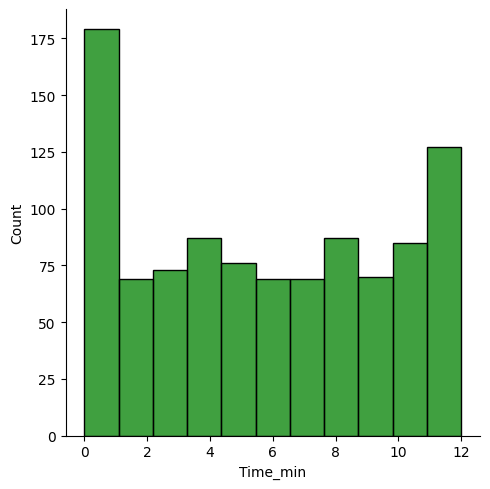

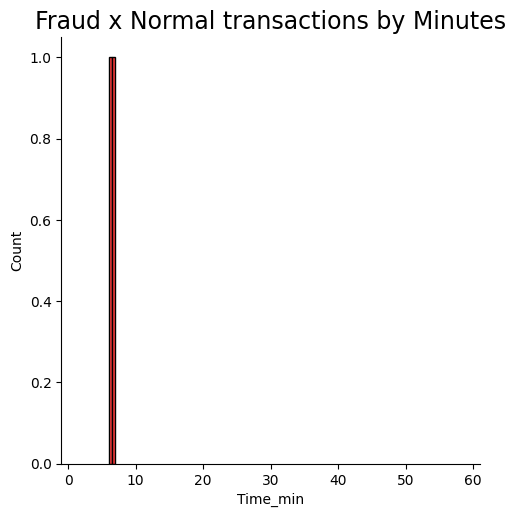

In [24]:
plt.figure(figsize=(12,5))
sns.displot(data[data['Class']==0]['Time_min'],color='g')
sns.displot(data[data['Class']==1]['Time_min'],color='r')
plt.title('Fraud x Normal transactions by Minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

In [25]:
# Feature Engineering to a better Visualization of the values
data['Amount_log']=np.log(data.Amount+0.01)
df_data=data

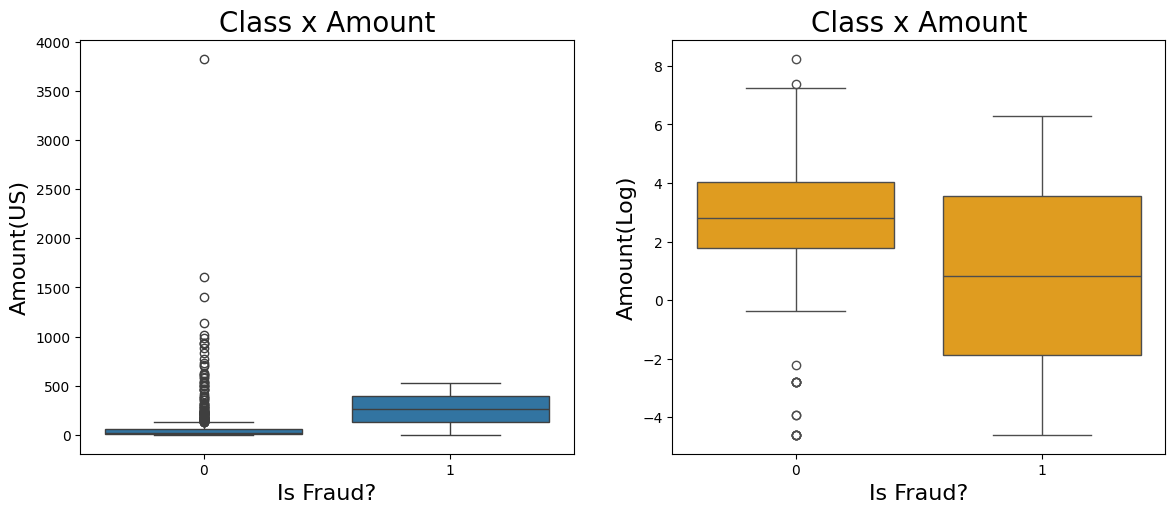

In [26]:
# Distribuition of Amount Transacition

plt.figure(figsize=(14,6))
plt.subplot(121)
ax=sns.boxplot(x="Class",y="Amount",data=df_data)
ax.set_title("Class x Amount",fontsize=20)
ax.set_xlabel("Is Fraud?",fontsize=16)
ax.set_ylabel("Amount(US)",fontsize=16)

plt.subplot(122)
ax1=sns.boxplot(x="Class",y="Amount_log",data=df_data,color='orange')
ax1.set_title("Class x Amount",fontsize=20)
ax1.set_xlabel("Is Fraud?",fontsize=16)
ax1.set_ylabel("Amount(Log)",fontsize=16)

plt.subplots_adjust(hspace=0.6,top=0.8)

plt.show()

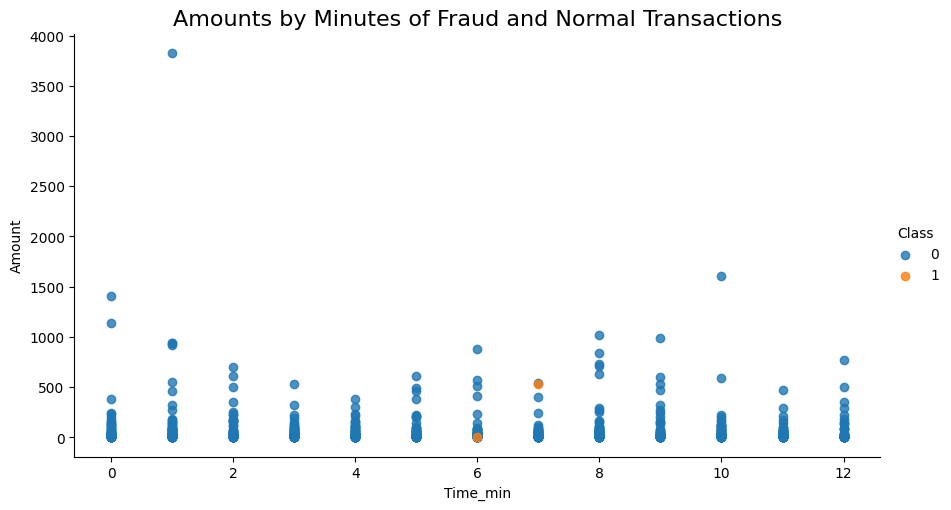

In [27]:
# Looking the Amount and time distribution of Fraud Transaction
ax=sns.lmplot(y='Amount',x='Time_min',fit_reg=False,aspect=1.8,data=df_data,hue='Class')
plt.title("Amounts by Minutes of Fraud and Normal Transactions",fontsize=16)
plt.show()

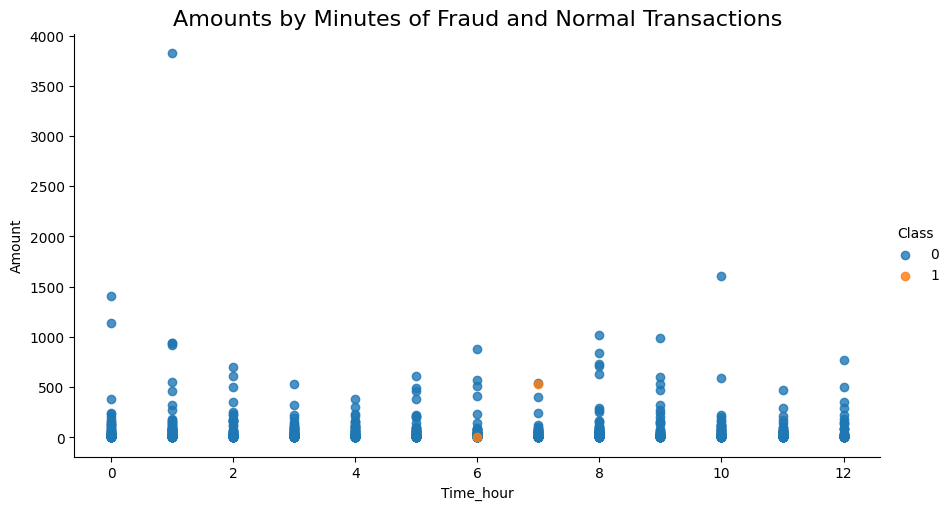

In [28]:
# Looking the Time_Hour Distribuition by Amount
ax=sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=1.8,data=df_data,hue='Class')
plt.title("Amounts by Minutes of Fraud and Normal Transactions",fontsize=16)
plt.show()

C:\Users\gsaig\AppData\Local\Temp\ipykernel_1904\3901713593.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data[col][f],bins=50,color='g')
C:\Users\gsaig\AppData\Local\Temp\ipykernel_1904\3901713593.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data[col][n],bins=50,color='r')


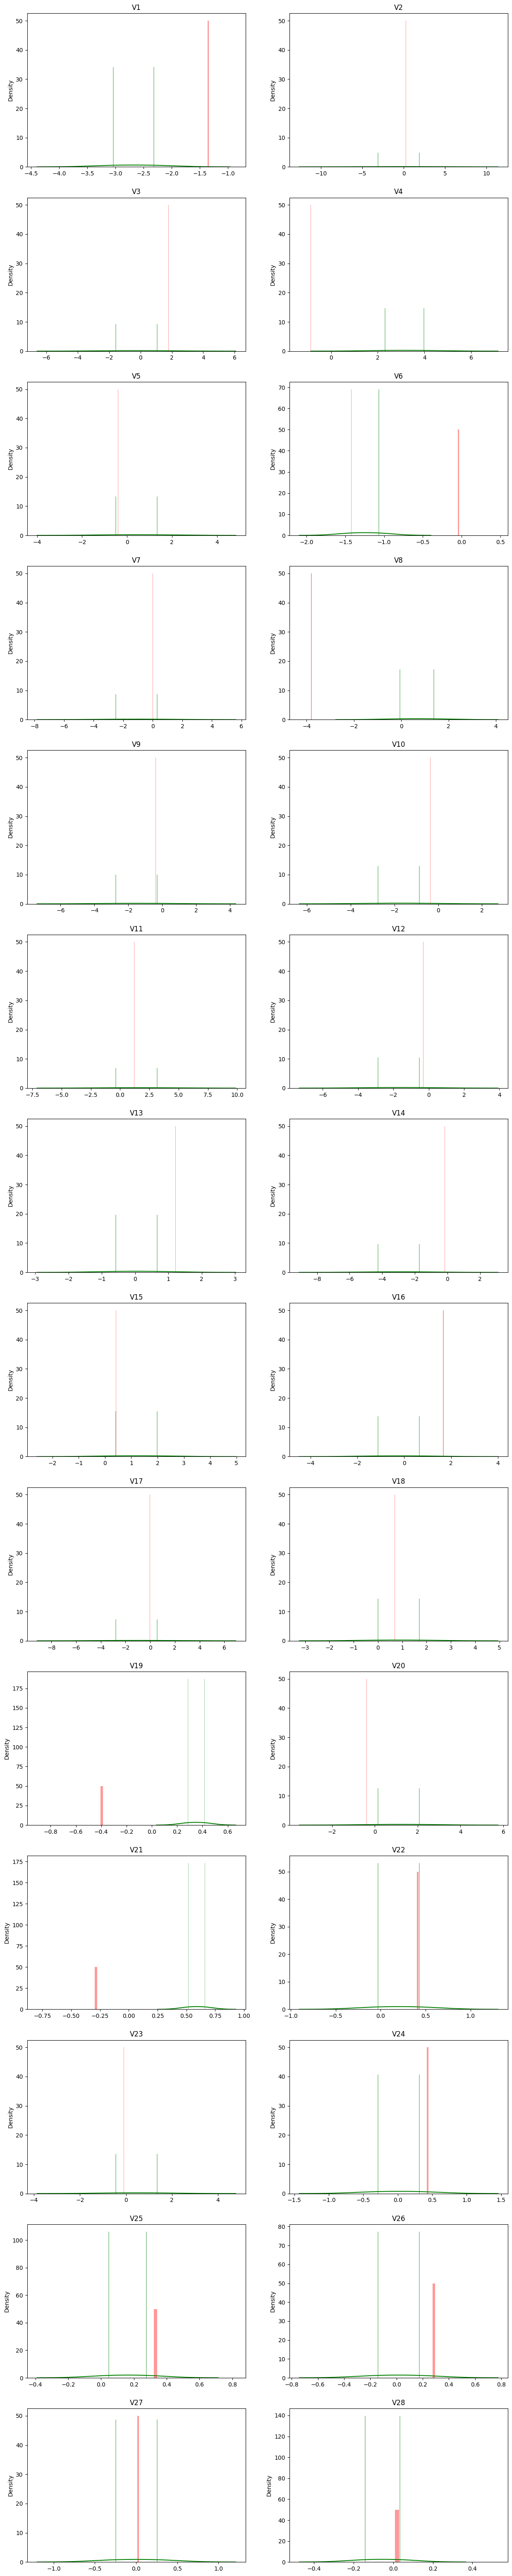

In [29]:
# Looking the V's Features

columns=df_data.iloc[:,1:29].columns

f=df_data.Class==1
n=df_data.Class==0

g=gridspec.GridSpec(14,2)
plt.figure(figsize=(15,20*4))

for n,col in enumerate(df_data[columns]):
    ax=plt.subplot(g[n])
    sns.distplot(df_data[col][f],bins=50,color='g')
    sns.distplot(df_data[col][n],bins=50,color='r')
    ax.set_ylabel("Density")
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

Feature Selection

In [30]:
df_data = df_data[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]